<a href="https://colab.research.google.com/github/Rajdip-projects/TECHNOHACKS/blob/main/Employee_turnover_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name - Rajdip Khan
DATA SCIENCE INTERNSHIP @ TECHNOHACKS
EDUTECH

TASK 2

PROJECT NAME - Employee turnover prediction

### **Connect with the GitHub Repositories**

In [14]:
!git clone https://github.com/Rajdip-projects/TECHNOHACKS.git

fatal: destination path 'TECHNOHACKS' already exists and is not an empty directory.


### Problem Statement
Use a dataset of employee information and
build a model that can predict which
employees are most likely to leave the
company.

### Load and Preprocess the Data

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/TECHNOHACKS/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Check for any missing values
print(df.isnull().sum())

# Drop columns that are not useful for prediction
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Convert categorical variables into numerical ones using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Exploratory Data Analysis (EDA)
a. Distribution of Attrition

<ipython-input-16-a23c2949c19a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Yes', data=df, palette='coolwarm')


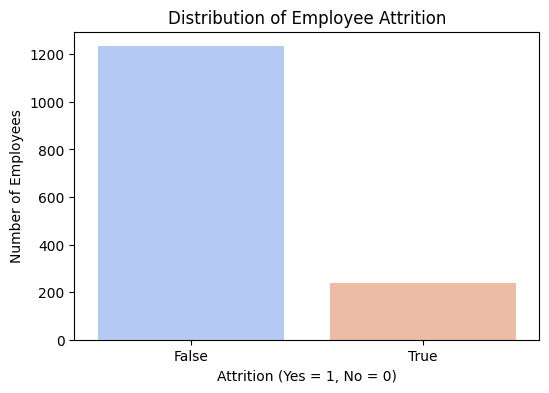

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Yes', data=df, palette='coolwarm')
plt.title('Distribution of Employee Attrition')
plt.xlabel('Attrition (Yes = 1, No = 0)')
plt.ylabel('Number of Employees')
plt.show()


b. Correlation Matrix

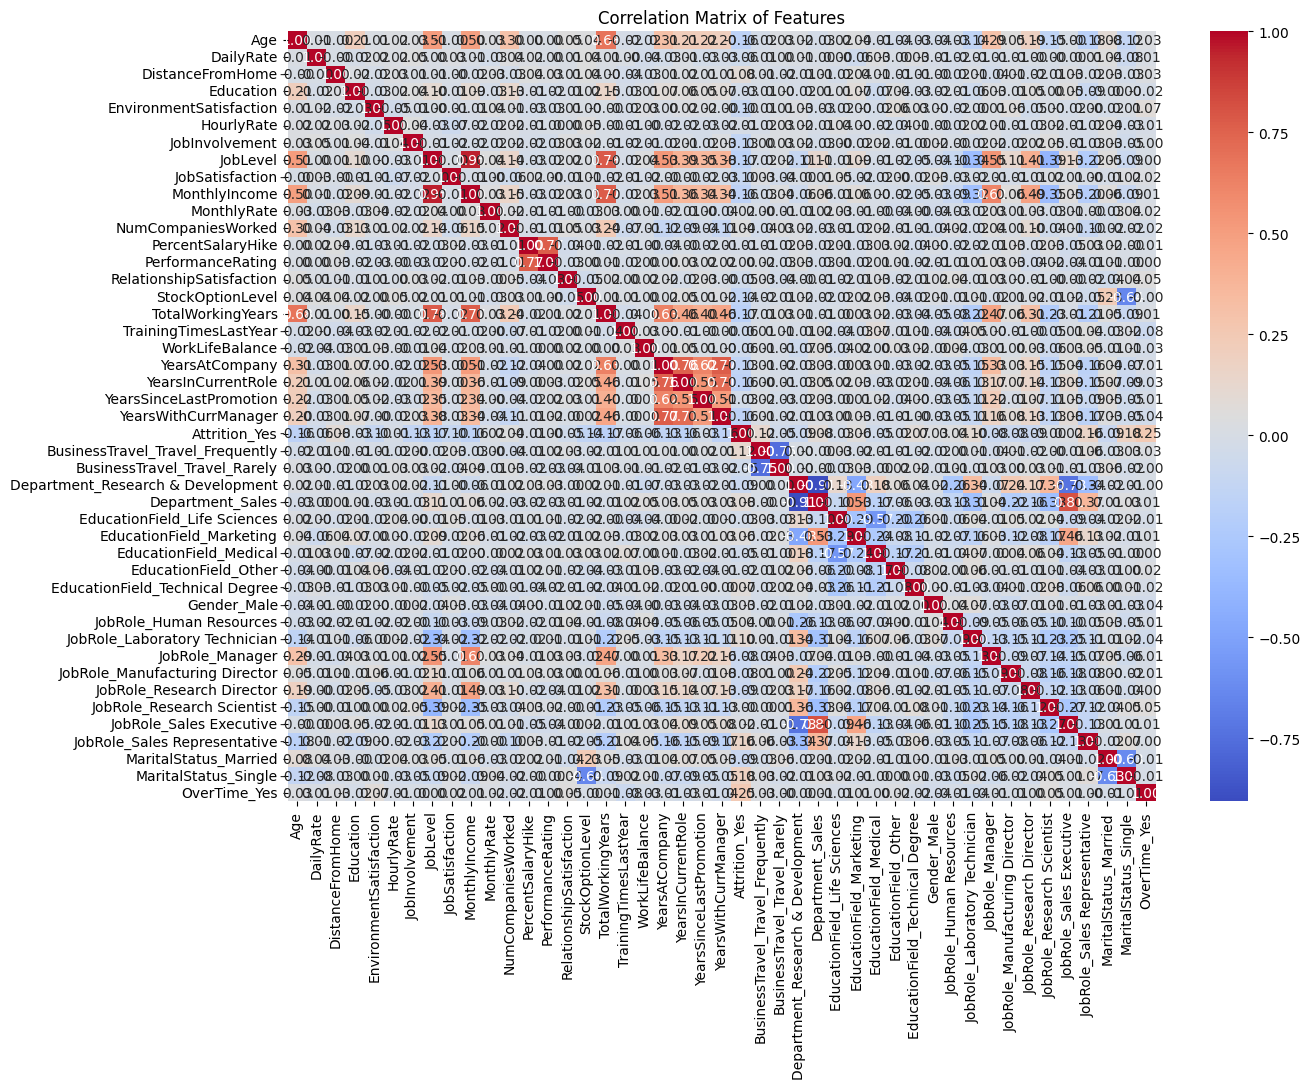

In [17]:
# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


### Feature Selection

In [18]:
# Define the target variable and features
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']


### Split the Data

In [19]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model Selection

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Model selection and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluate the Model

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model evaluation
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[254   1]
 [ 35   4]]
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Accuracy: 0.8775510204081632


### Visualize Feature Importance

<ipython-input-23-19cdd688774e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns[indices], y=importances[indices], palette='coolwarm')


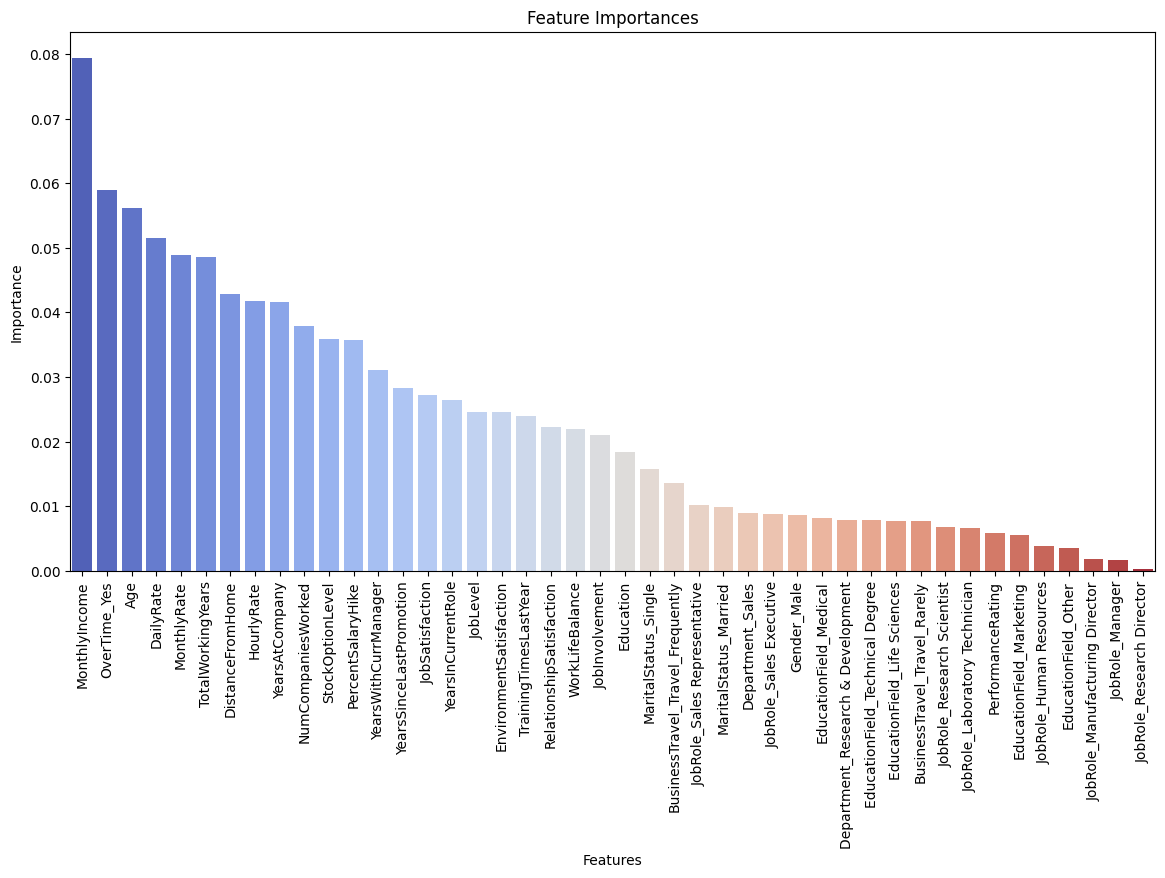

In [23]:
import numpy as np

# Feature importance visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 7))
sns.barplot(x=X.columns[indices], y=importances[indices], palette='coolwarm')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


### Make Predictions

In [26]:
# Get the column names from the training data
columns = X.columns

# Define the new employee data with all features
new_employee = pd.DataFrame(columns=columns)
new_employee.loc[0] = 0  # Initialize with zeros

# Fill in the actual values for the new employee
new_employee['Age'] = 35
new_employee['BusinessTravel_Travel_Rarely'] = 1
new_employee['DailyRate'] = 1200
new_employee['Department_Sales'] = 1
new_employee['DistanceFromHome'] = 5
new_employee['Education'] = 3
new_employee['EducationField_Life Sciences'] = 1
new_employee['EnvironmentSatisfaction'] = 3
new_employee['Gender_Male'] = 1
new_employee['HourlyRate'] = 60
new_employee['JobInvolvement'] = 3
new_employee['JobLevel'] = 2
new_employee['JobRole_Sales Executive'] = 1
new_employee['JobSatisfaction'] = 4
new_employee['MaritalStatus_Married'] = 1
new_employee['MonthlyIncome'] = 5000
new_employee['MonthlyRate'] = 15000
new_employee['NumCompaniesWorked'] = 1
new_employee['OverTime_Yes'] = 0  # OverTime is No, so OverTime_Yes should be 0
new_employee['PercentSalaryHike'] = 10
new_employee['PerformanceRating'] = 3
new_employee['RelationshipSatisfaction'] = 3
new_employee['StockOptionLevel'] = 1
new_employee['TotalWorkingYears'] = 10
new_employee['TrainingTimesLastYear'] = 3
new_employee['WorkLifeBalance'] = 3
new_employee['YearsAtCompany'] = 5
new_employee['YearsInCurrentRole'] = 4
new_employee['YearsSinceLastPromotion'] = 2
new_employee['YearsWithCurrManager'] = 3

# Apply the same scaling as the training data
new_employee_scaled = scaler.transform(new_employee)

# Predict whether the employee will leave
prediction = model.predict(new_employee_scaled)

# Output the prediction
if prediction[0] == 1:
    print("The employee is likely to leave the company.")
else:
    print("The employee is not likely to leave the company.")


The employee is not likely to leave the company.
